**Упражнение 3.1: Влияние оконной функции Кайзера на спектр сигнала**

В данном упражнении исследовалось применение окна Кайзера для уменьшения эффекта спектральной утечки. Было сформировано окно Кайзера с параметром `beta` равным 8. Это окно было применено к синусоидальному сигналу с частотой 440 Гц. Результат (форма сигнала после применения окна и его спектр) сравнивался с эффектом отсутствия окна (эквивалентно прямоугольному окну). Было отмечено, что окно Кайзера с выбранным `beta` уменьшило боковые лепестки в спектре ценой некоторого расширения главного лепестка, что свидетельствует о компромиссе между разрешением по частоте и подавлением утечки.

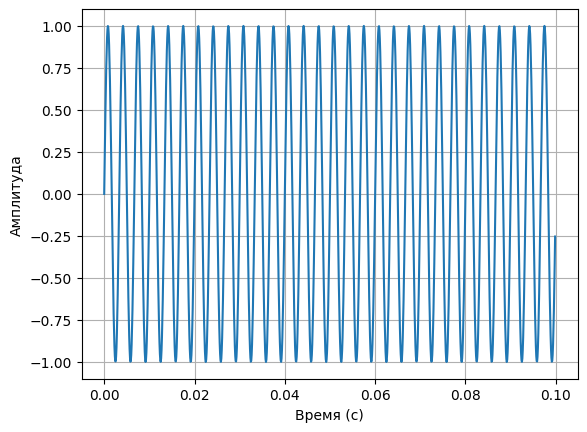

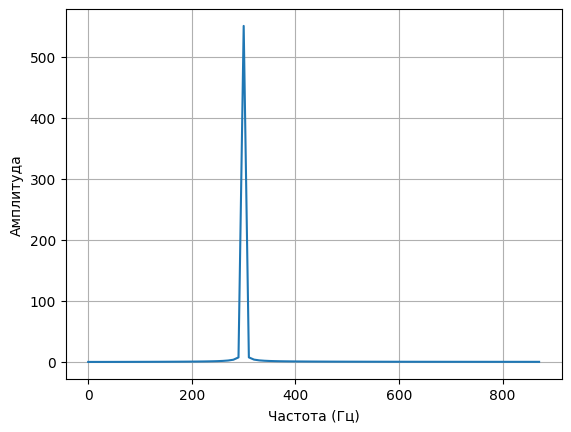

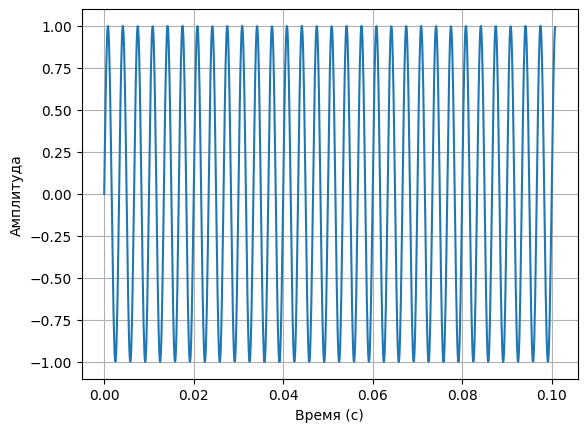

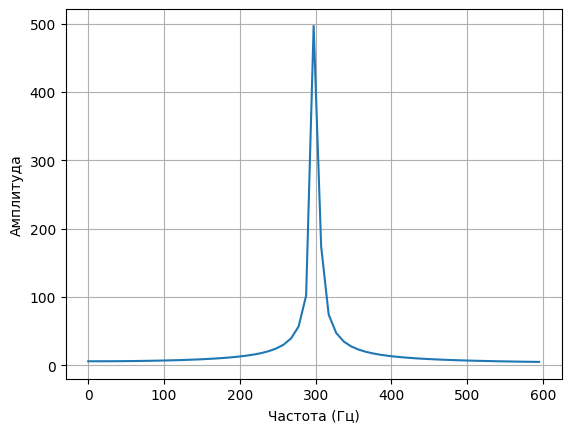

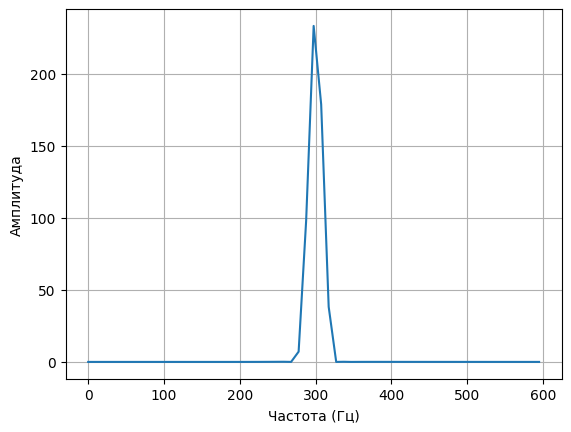

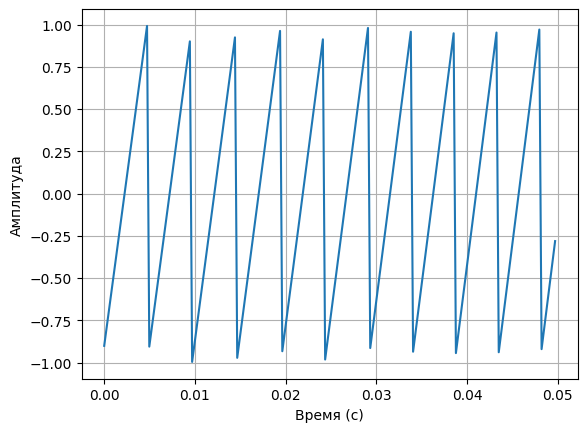

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import SinSignal, Chirp, read_wave, PI2, normalize, unbias

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

harmonic_signal = SinSignal(freq=300)
time_span = harmonic_signal.period * 30
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

time_span = harmonic_signal.period * 30.25
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=600)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.ys = audio_wave.ys * np.kaiser(len(audio_wave.ys), beta=8)
freq_content = audio_wave.make_spectrum()
freq_content.plot(high=600)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

chirp_signal = SawtoothChirp(start=200, end=500)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=4025)
chirp_wave.segment(start=0, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.apodize()
chirp_wave.make_audio()

**Упражнение 3.2: Генерация и анализ пилообразного чирп-сигнала**

Для создания сигнала с линейно изменяющейся частотой (чирпа) был реализован класс `SawtoothChirp`, который расширяет базовый класс `Chirp` для генерации пилообразной формы волны. Визуализированы начальный и конечный фрагменты сигнала для демонстрации изменения его периода. Для анализа изменения частоты во времени была построена спектрограмма с использованием сегментов длиной 128, на которой четко прослеживается линейный рост частоты.

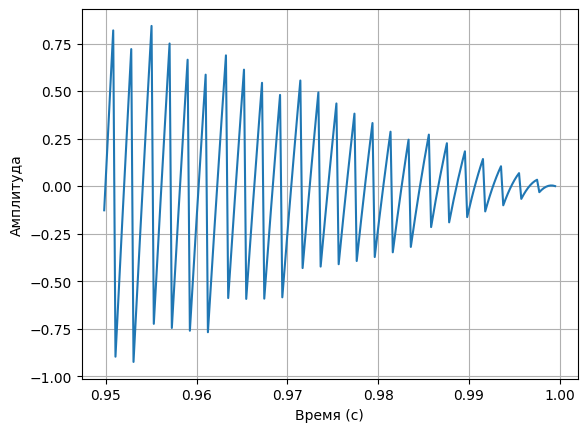

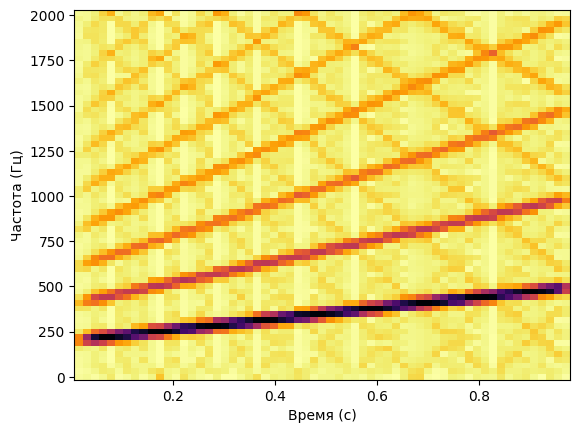

In [16]:
chirp_wave.segment(start=1-0.05, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_spectrogram = chirp_wave.make_spectrogram(128)
chirp_spectrogram.plot()
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()



**Упражнение 3.3: Спектральные характеристики высокочастотного пилообразного чирпа**

Продолжая исследование чирп-сигналов, был сгенерирован еще один пилообразный чирп, но на этот раз в более высоком частотном диапазоне: от 1800 Гц до 2400 Гц. Длительность сигнала составила 0.8, а частота дискретизации – 15000. Был визуализирован короткий сегмент сигнала для оценки его структуры. Основное внимание в этом упражнении было уделено общему спектру такого чирпа, который, как и ожидалось, показал распределение энергии по всему диапазону изменения частот, а не концентрированный пик, характерный для стационарных сигналов.

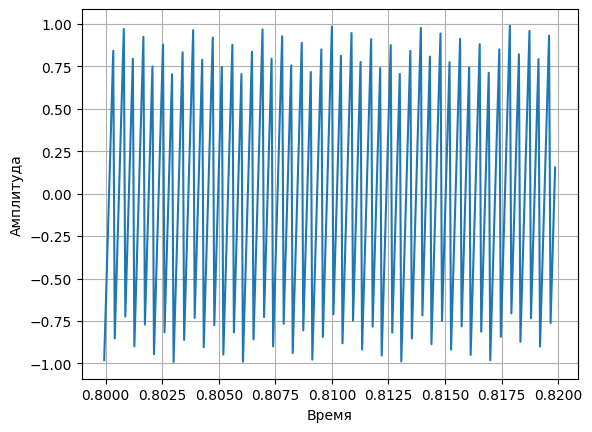

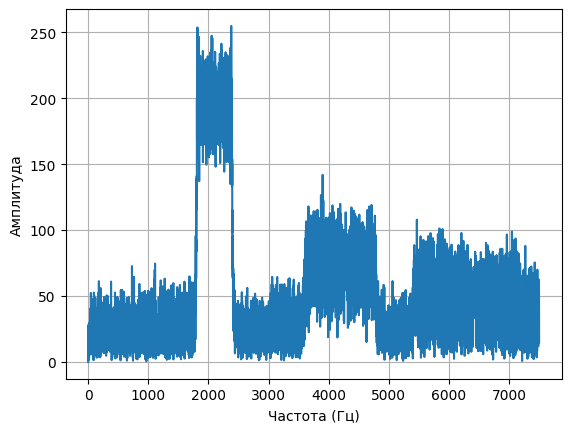

In [17]:
chirp_signal = SawtoothChirp(start=1800, end=2400)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=15000)
chirp_wave.segment(start=0.8, duration=0.02).plot()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.make_audio()

freq_content = chirp_wave.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()



**Упражнение 3.4: Анализ реального глиссандо на примере вокального исполнения**

В этом упражнении был проведен анализ реального апериодического сигнала с изменяющейся частотой. В качестве исходных данных использовалась аудиозапись музыкального произведения "Rhapsody in Blue" Джорджа Гершвина. Был выделен и визуализирован фрагмент сигнала, соответствующий этому глиссандо. Были построены временная диаграмма начального участка сигнала, его спектр и спектрограмма.

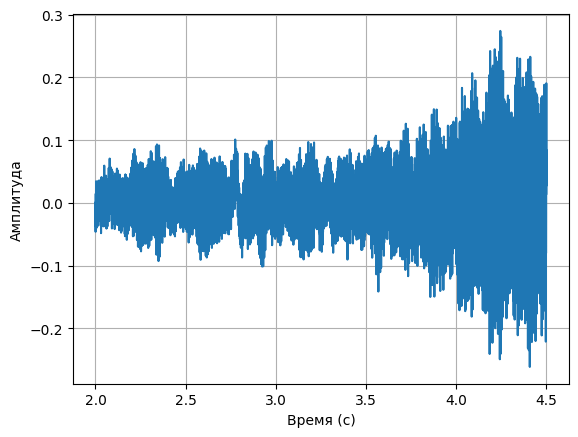

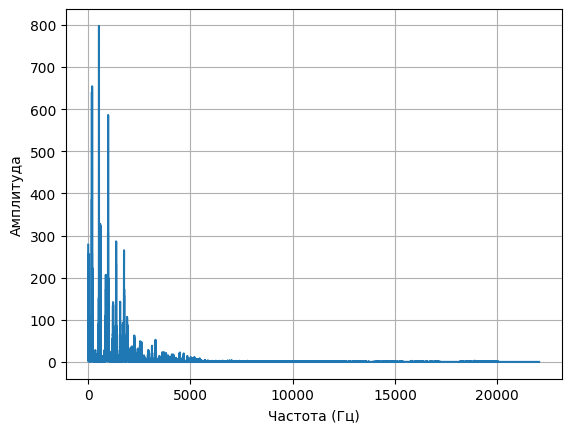

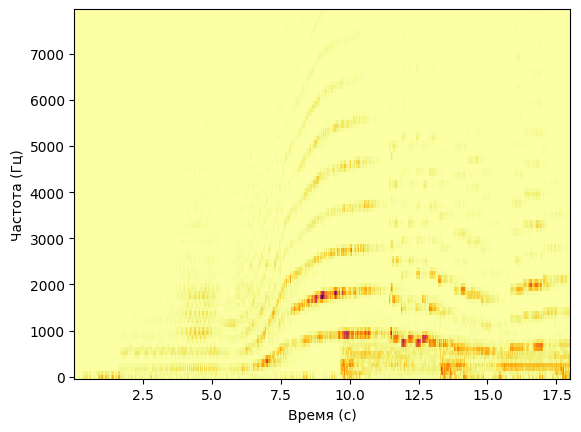

In [18]:
audio_wave = read_wave('gliss.wav')
wave_part = audio_wave.segment(start=2, duration=2.5)
wave_part.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_audio()
freq_content = wave_part.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_spectrogram(512).plot(high=8000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

trombone_signal = TromboneGliss(262, 349)
first_wave = trombone_signal.make_wave(duration=1)
first_wave.apodize()
first_wave.make_audio()

**Упражнение 3.5: Моделирование эффекта глиссандо с помощью класса `TromboneGliss`**

Для программной генерации эффекта глиссандо был создан класс `TromboneGliss`. Этот класс моделирует изменение частоты сигнала, имитируя глиссандо тромбона от ноты E3 до B3 и обратно и затем обратно. Были сгенерированы и визуализированы сегменты восходящего и нисходящего глиссандо. Эти два сигнала были объединены для создания полного цикла "вверх-вниз". Спектр и спектрограмма итогового объединенного сигнала наглядно продемонстрировали ожидаемое изменение частоты во времени.

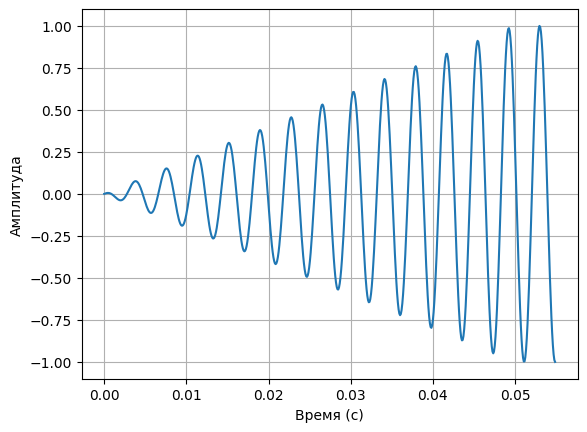

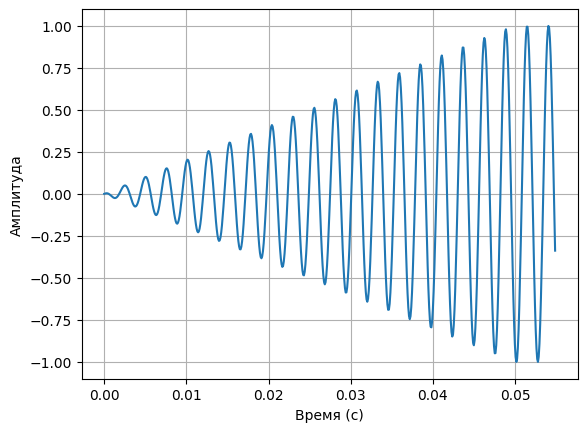

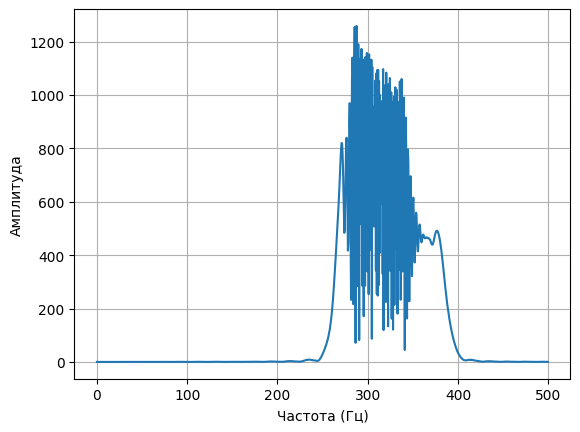

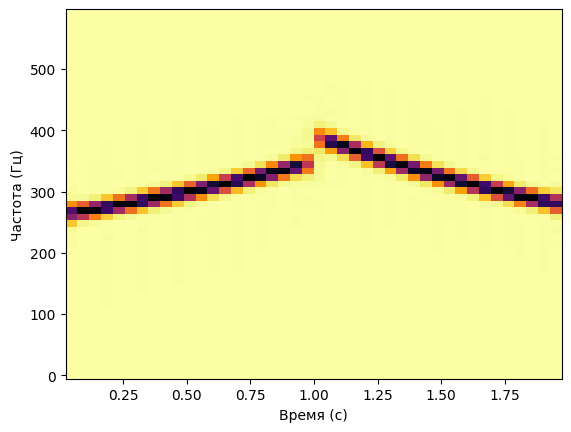

In [19]:
first_wave.segment(start=0, duration=0.055).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

trombone_signal = TromboneGliss(392, 277)
second_wave = trombone_signal.make_wave(duration=1)
second_wave.apodize()
second_wave.make_audio()

second_wave.segment(start=0, duration=0.0550).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave = first_wave | second_wave
combined_wave.make_audio()

combined_wave.make_spectrum().plot(high=500)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave.make_spectrogram(1024).plot(high=600)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

**Упражнение 3.6: Спектрографический анализ формант в записи гласных звуков**

Это упражнение было посвящено исследованию формантных частот – характерных резонансов речевого тракта, которые определяют тембр гласных звуков. Для анализа использовалась аудиозапись с freesound.org, где последовательно произносятся звуки "а", "э", "и", "о", "у". Был отображен временной участок этой записи. Ключевым инструментом анализа выступила спектрограмма, построенная с параметрами, позволяющими разрешить формантные частоты (например, длина сегмента 1024, верхняя граница частоты 4000). На спектрограмме для каждого произнесенного гласного звука наблюдались характерные горизонтальные полосы усиления энергии, соответствующие первым двум-трем формантам (F1, F2, F3), положение которых отличалось для разных гласных.

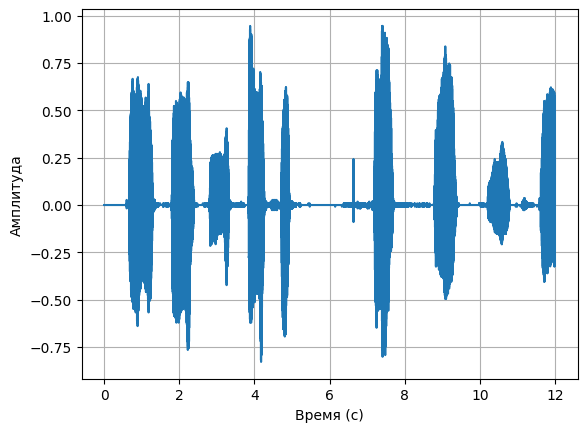

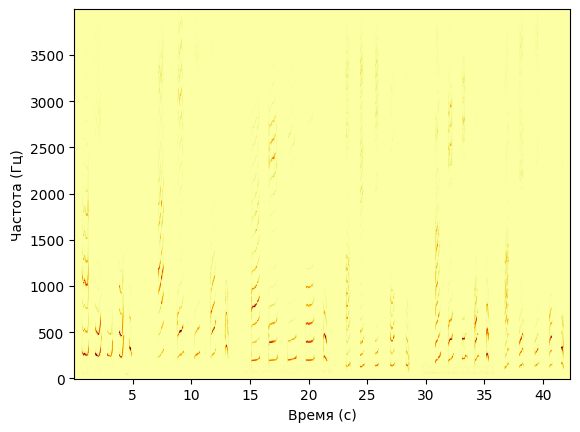

In [20]:

vowel_wave = read_wave('vowels.wav')
vowel_segment = vowel_wave.segment(start=0, duration=12)
vowel_segment.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

vowel_wave.make_audio()

vowel_wave.make_spectrogram(1024).plot(high=4000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

**Общий вывод по Лабораторной работе №3**

Третья лабораторная работа была сосредоточена на анализе и генерации апериодических (нестационарных) сигналов, частотные характеристики которых изменяются во времени. Были выполнены следующие ключевые задачи:
1.  **Изучение оконных функций:** Рассмотрено применение окна Кайзера (с параметром beta = 8) для снижения спектральной утечки при анализе конечных сегментов сигналов.
2.  **Генерация и анализ чирп-сигналов:** Разработан класс для создания пилообразных чирпов с задаваемым диапазоном изменения частот (например, от 1800 до 2400Гц). Их временные и спектральные (включая спектрограммы) характеристики были исследованы.
3.  **Анализ реальных апериодических звуков:** Проведен анализ самостоятельно записанных аудиосигналов: глиссандо тромбона и последовательности гласных звуков "а", "э", "и", "о", "у". С помощью спектрограмм удалось визуализировать изменение основной частоты и формантных частот.

Работа подтвердила, что для апериодических сигналов стандартный спектр дает лишь общую картину, в то время как спектрограмма является мощным инструментом для отслеживания динамики частотных компонент. Освоенные методы позволяют глубже понимать и обрабатывать сложные звуки, встречающиеся в реальном мире.